In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [2]:
cd C:\Users\WINSTON A\Documents

C:\Users\WINSTON A\Documents


In [3]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df["is_sarcastic"] = df["is_sarcastic"].map({0: "Not Sarcasm", 1: "Sarcasm"})
print(df.head())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline is_sarcastic  
0  former versace store clerk sues over secret 'b...  Not Sarcasm  
1  the 'roseanne' revival catches up to our thorn...  Not Sarcasm  
2  mom starting to fear son's web series closest ...      Sarcasm  
3  boehner just wants wife to listen, not come up...      Sarcasm  
4  j.k. rowling wishes snape happy birthday in th...  Not Sarcasm  


In [5]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,Not Sarcasm
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,Sarcasm
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",Sarcasm
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,Not Sarcasm
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,Not Sarcasm
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,Not Sarcasm
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,Not Sarcasm


# Exploratory Data Anlaysis

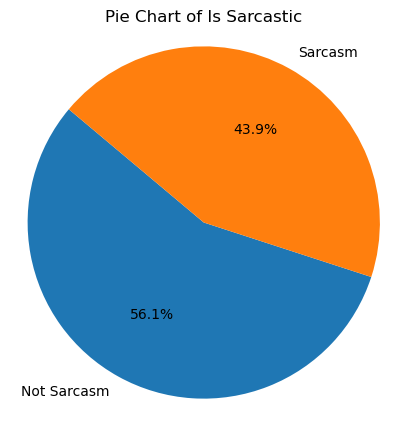

In [32]:
#Pie Chart

counts = df['is_sarcastic'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Is Sarcastic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The Vaues are approximately equally distributed

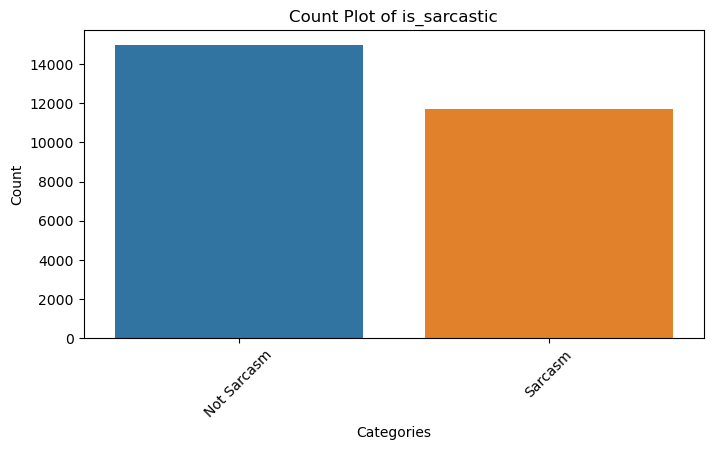

In [33]:
#Count Plot

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['is_sarcastic'])
plt.title('Count Plot of is_sarcastic')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [6]:
data = df[['headline','is_sarcastic']]
x = np.array(data['headline'])
y = np.array(data['is_sarcastic'])
print(x,y)

["former versace store clerk sues over secret 'black code' for minority shoppers"
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse"
 "mom starting to fear son's web series closest thing she will have to grandchild"
 ... 'reparations and obama'
 'israeli ban targeting boycott supporters raises alarm abroad'
 'gourmet gifts for the foodie 2014'] ['Not Sarcasm' 'Not Sarcasm' 'Sarcasm' ... 'Not Sarcasm' 'Not Sarcasm'
 'Not Sarcasm']


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

print("Xtrain : ",X_train)

Xtrain :    (0, 13608)	1
  (0, 17472)	1
  (0, 23363)	1
  (0, 1185)	1
  (0, 581)	1
  (0, 24674)	1
  (1, 22827)	1
  (1, 11123)	1
  (1, 25186)	1
  (1, 16491)	1
  (1, 5815)	1
  (1, 13195)	1
  (1, 12866)	1
  (1, 12418)	1
  (1, 14914)	1
  (1, 19774)	1
  (1, 3484)	1
  (2, 23843)	1
  (2, 11123)	1
  (2, 25186)	1
  (2, 24703)	1
  (2, 18681)	1
  (2, 13280)	1
  (2, 7048)	1
  (2, 5267)	1
  :	:
  (21364, 22582)	1
  (21364, 1117)	1
  (21364, 22579)	1
  (21364, 21100)	1
  (21364, 16682)	1
  (21364, 20344)	1
  (21364, 5811)	1
  (21364, 2374)	1
  (21364, 14571)	1
  (21364, 46)	1
  (21364, 2765)	1
  (21365, 8863)	1
  (21365, 3705)	1
  (21365, 15602)	1
  (21365, 2250)	1
  (21365, 13573)	1
  (21365, 22842)	1
  (21365, 10833)	1
  (21365, 737)	1
  (21365, 5088)	1
  (21366, 22582)	1
  (21366, 3378)	1
  (21366, 14040)	1
  (21366, 5709)	1
  (21366, 19100)	1


In [10]:
print(X.toarray())  #output shows no common text in samples in a column

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
model = BernoulliNB()
fitting = model.fit(X_train, y_train)
print("The Accuracy Score is : ",model.score(X_test, y_test))

The Accuracy Score is :  0.8448146761512542


In [37]:
y_pred = model.predict(X_test)
y_pred

array(['Sarcasm', 'Not Sarcasm', 'Not Sarcasm', ..., 'Sarcasm',
       'Not Sarcasm', 'Sarcasm'], dtype='<U11')

In [16]:
print(y_test)  # Here we encounter slight difference between prediction and the Actual ground truth... Because accuracy is 84.5%

['Sarcasm' 'Not Sarcasm' 'Not Sarcasm' ... 'Sarcasm' 'Sarcasm' 'Sarcasm']


**Metrics**

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_pred_encoded = le.transform(y_pred) 

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test_encoded, y_pred_encoded)
print("Precision:", precision)

# Recall
recall = recall_score(y_test_encoded, y_pred_encoded)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test_encoded, y_pred_encoded)
print("F1-score:", f1)

Accuracy: 0.8448146761512542
Precision: 0.8596491228070176
Recall: 0.7728047740835464
F1-score: 0.8139169472502806


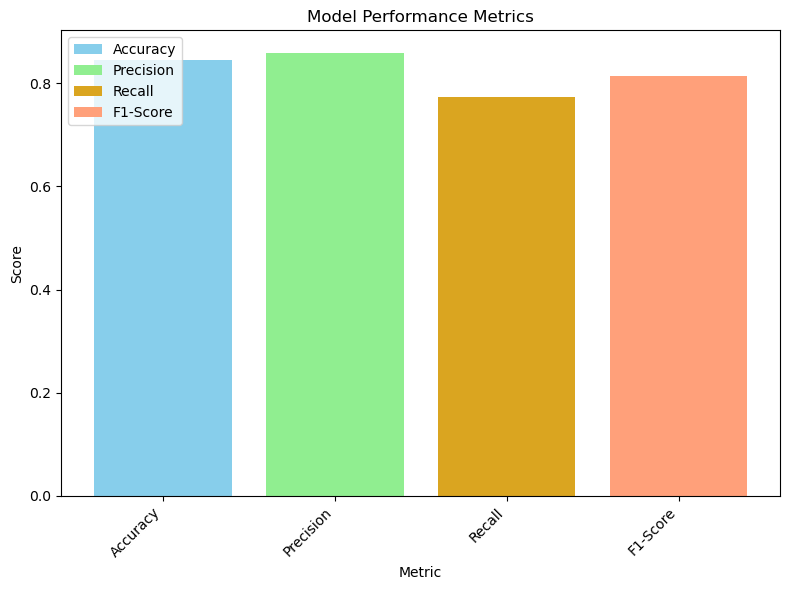

In [49]:
# Sample data (assuming you have already calculated these metrics)
accuracy = 0.8448
precision = 0.8596
recall = 0.7728
f1_score = 0.8139

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar positions
x = [1, 2, 3, 4]  # Positions for each metric

# Create the bar plot
bars = ax.bar(x, [accuracy, precision, recall, f1_score], color=['skyblue', 'lightgreen', 'goldenrod', 'lightsalmon'])

# Set metric labels and positions
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'], rotation=45, ha='right')

# Set axis labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')

legend_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.legend(bars, legend_labels, loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [43]:
text = input("Enter the text : ")
data_txt = cv.transform([text]).toarray()
output = model.predict(data_txt)
output

Enter the text : astroid hitting earth


array(['Not Sarcasm'], dtype='<U11')